## Some image analysis with python
based on https://towardsdatascience.com/building-an-image-color-analyzer-using-python-12de6b0acf74

In [20]:
#based on https://towardsdatascience.com/building-an-image-color-analyzer-using-python-12de6b0acf74
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

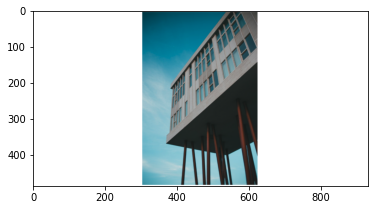

In [28]:
image = cv2.imread("/Users/leagleissner/Desktop/test.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [22]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation=cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0] * modified_img.shape[1], 3)
    return modified_img

In [23]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [24]:
def color_analysis(img):
    clf = KMeans(n_clusters=5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize=(12, 8))
    plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

In [25]:
def heavy_colors(img):
    # takes an image and returns a dictionary with the most heavy colours in descending order
    clf = KMeans(n_clusters=5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    #hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    hex_colors = [ordered_colors[i] for i in counts.keys()]
    print(hex_colors)

In [26]:
from scipy.spatial import KDTree
from webcolors import (
    CSS3_NAMES_TO_HEX,
    hex_to_rgb,)

def convert_rgb_to_names(rgb_tuple):
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_NAMES_TO_HEX
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))

    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return f'closest match: {names[index]}'

SyntaxError: invalid syntax (1297325198.py, line 5)

['#fefefe', '#8b8a7f', '#c9bd8a', '#816a0d', '#272824']
[array([254.96453464, 254.95836357, 254.93028436]), array([139.97781532, 138.38623208, 126.81668447]), array([39.19554884, 40.49570502, 36.60942858]), array([129.46015931, 106.46390608,  13.43995448]), array([201.32197646, 189.52617695, 138.41418425])]


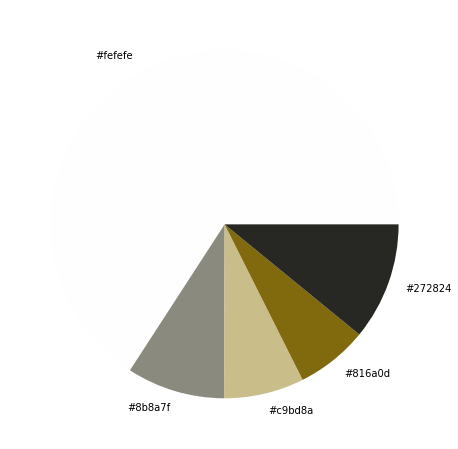

In [27]:
modified_image = prep_image(image)
color_analysis(modified_image)
heavy_colors(modified_image)

# Our data

In [49]:
#https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder
import os
images = []
folder = "/Users/leagleissner/Documents/GitHub/InformationRetrieval/images"
for image in folder:
    img = cv2.imread(os.path.join(folder,image))
    if img is not None:
        images.append(img)

[ WARN:0@1473.002] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/leagleissner/Documents/GitHub/InformationRetrieval/images/U'): can't open/read file: check file path/integrity
[ WARN:0@1473.002] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/leagleissner/Documents/GitHub/InformationRetrieval/images/s'): can't open/read file: check file path/integrity
[ WARN:0@1473.002] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/leagleissner/Documents/GitHub/InformationRetrieval/images/e'): can't open/read file: check file path/integrity
[ WARN:0@1473.003] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/leagleissner/Documents/GitHub/InformationRetrieval/images/r'): can't op